# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 23 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

np.random.seed(42)  # зафиксируем seed

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [2]:
def draw_confidence_interval(sample, estimates, confidence_interval, start, dist_name, est_latex, color):
    plt.figure(figsize=(12, 8))
    plt.title(f'Зависимость оценки и доверительного интервала {dist_name} от величины выборки')
    plt.xlabel('Величина выборки')
    plt.ylabel(r'Оценка параметра $\hat\theta$')
    plt.fill_between(
        np.arange(start, len(confidence_interval[0]) + 1),
        confidence_interval[0][start - 1:],
        confidence_interval[1][start - 1:],
        color=color,
        alpha=0.5,
        label='Доверительный интервал'
    )
    plt.plot(np.arange(start, len(estimates) + 1), estimates[start - 1:], lw=3, color=color, label=est_latex)
    plt.scatter(np.arange(start, len(sample) + 1), sample[start - 1:], color=color, label='Точки выборки')
    plt.legend()

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

In [3]:
n = 100

sample_size = np.arange(1, n + 1)
alpha = 0.95

color_for_uniform = sns.color_palette()[0]
color_for_cauchy = sns.color_palette()[1]
color_for_poiss = sns.color_palette()[2]
color_for_gamma = sns.color_palette()[3]

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

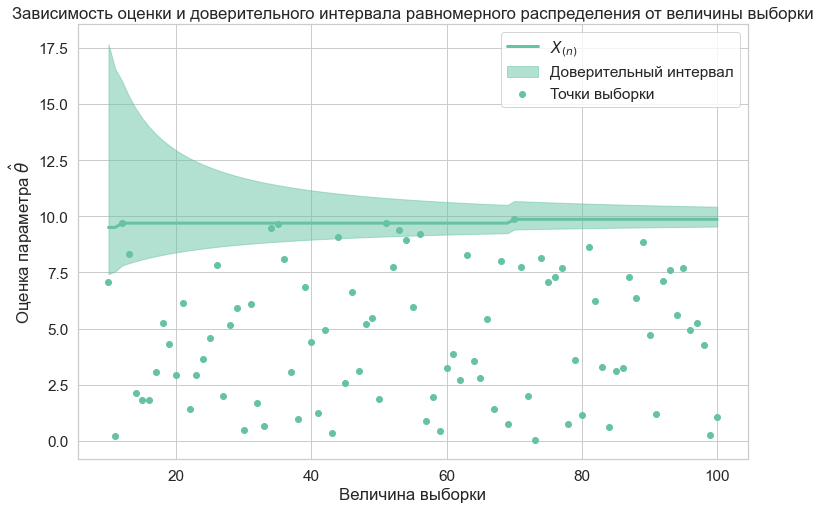

In [4]:
theta = 10
uniform_dist = sps.uniform(0, theta)
uniform_sample = uniform_dist.rvs(size=n)
uniform_estimates = np.maximum.accumulate(uniform_sample)
uniform_confidence_interval = np.array([
    (uniform_estimates * (sample_size + 1) / sample_size) /
    (1 + np.sqrt(1 / ((1 - alpha) * sample_size * (sample_size + 2)))),
    (uniform_estimates * (sample_size + 1) / sample_size) /
    (1 - np.sqrt(1 / ((1 - alpha) * sample_size * (sample_size + 2))))
])
draw_confidence_interval(
    uniform_sample,
    uniform_estimates,
    uniform_confidence_interval,
    10,
    'равномерного распределения',
    '$X_{(n)}$',
    color_for_uniform
)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

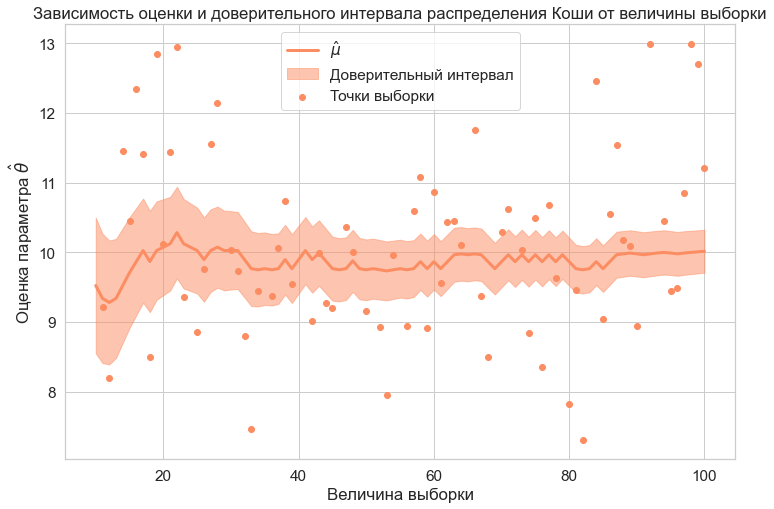

In [5]:
theta = 10
cauchy_dist = sps.cauchy(theta)
cauchy_sample = cauchy_dist.rvs(size=n)
cauchy_estimates = [np.median(cauchy_sample[:i]) for i in range(1, len(cauchy_sample) + 1)]
cauchy_confidence_interval = np.array([
    cauchy_estimates - ((sps.norm.ppf((1 + alpha) / 2) * np.pi / 2) / np.sqrt(sample_size)),
    cauchy_estimates - ((sps.norm.ppf((1 - alpha) / 2) * np.pi / 2) / np.sqrt(sample_size))
])
draw_confidence_interval(
    sps.mstats.trimboth(cauchy_sample, 0.1),
    cauchy_estimates,
    cauchy_confidence_interval,
    10,
    'распределения Коши',
    r'$\hat \mu$',
    color_for_cauchy
)

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

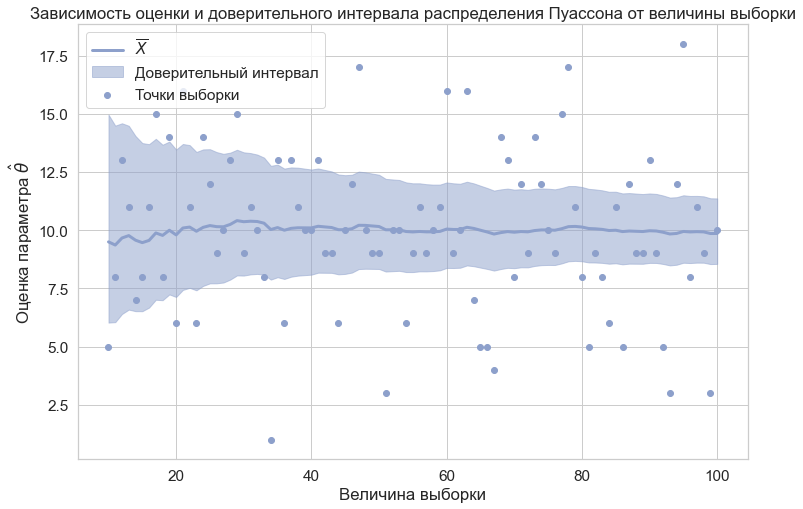

In [6]:
theta = 10
poiss_dist = sps.poisson(theta)
poiss_sample = poiss_dist.rvs(size=n)
poiss_estimates = np.cumsum(poiss_sample) / sample_size
poiss_confidence_interval = np.array([
    (np.sqrt(poiss_estimates + (1 / (4 * sample_size * (1 - alpha)))) -
     np.sqrt(1 / (4 * sample_size * (1 - alpha))))**2,
    (np.sqrt(poiss_estimates + (1 / (4 * sample_size * (1 - alpha)))) +
     np.sqrt(1 / (4 * sample_size * (1 - alpha))))**2
])
draw_confidence_interval(
    poiss_sample,
    poiss_estimates,
    poiss_confidence_interval,
    10,
    'распределения Пуассона',
    r'$\overline{X}$',
    color_for_poiss
)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

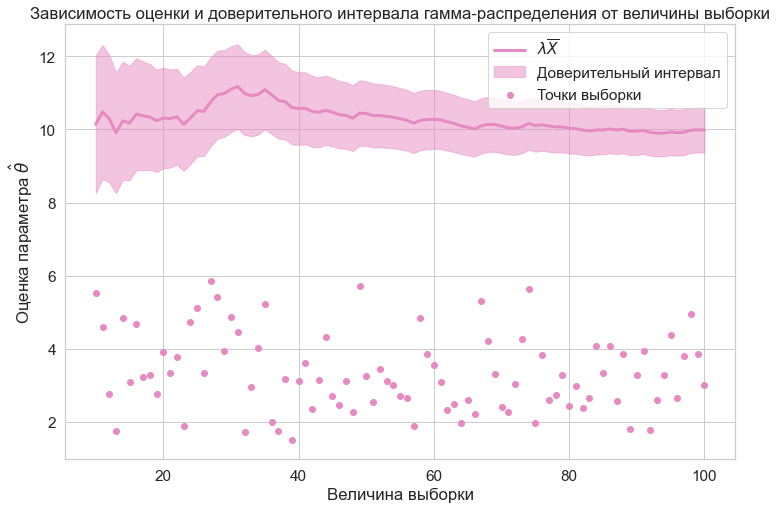

In [7]:
theta = 10
lambd = 3
gamma_dist = sps.gamma(theta, scale=1 / lambd)
gamma_sample = gamma_dist.rvs(size=n)
gamma_estimates = np.cumsum(gamma_sample) * lambd / sample_size
gamma_confidence_interval = np.array([
    gamma_estimates - (sps.norm.ppf((1 + alpha) / 2) * np.sqrt(gamma_estimates / (sample_size + 1))),
    gamma_estimates - (sps.norm.ppf((1 - alpha) / 2) * np.sqrt(gamma_estimates / (sample_size + 1)))
])
draw_confidence_interval(
    gamma_sample,
    gamma_estimates,
    gamma_confidence_interval,
    10,
    'гамма-распределения',
    r'$\lambda\overline{X}$',
    color_for_gamma
)

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

**Вывод:** С увеличением размера выборки доверительный интервал уменьшается. Это значит, что чем больше выборка, тем с большей точностью мы можем оценить параметр распределения.

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__ Достаточно сгенерировать 100 выборок размера 100.

In [8]:
num_samples = 10000

### Равномерное распределение

In [9]:
uniform_samples = uniform_dist.rvs(size=(num_samples, n))
uniform_estimates = np.max(uniform_samples, axis=-1)
uniform_conf_intervals = np.array([
    (uniform_estimates * (n + 1) / n) /
    (1 + np.sqrt(1 / ((1 - alpha) * n * (n + 2)))),
    (uniform_estimates * (n + 1) / n) /
    (1 - np.sqrt(1 / ((1 - alpha) * n * (n + 2))))
])
uniform_in_conf_interval = np.logical_and(uniform_conf_intervals[0] <= theta, theta <= uniform_conf_intervals[1])
uniform_probability_in_conf_interval = np.sum(uniform_in_conf_interval) / uniform_in_conf_interval.size
uniform_probability_in_conf_interval

0.9956

### Распределение Коши

In [10]:
cauchy_samples = cauchy_dist.rvs(size=(num_samples, n))
cauchy_estimates = np.median(cauchy_samples, axis=-1)
cauchy_conf_intervals = np.array([
    cauchy_estimates - ((sps.norm.ppf((1 + alpha) / 2) * np.pi / 2) / np.sqrt(n)),
    cauchy_estimates - ((sps.norm.ppf((1 - alpha) / 2) * np.pi / 2) / np.sqrt(n))
])
cauchy_in_conf_interval = np.logical_and(cauchy_conf_intervals[0] <= theta, theta <= cauchy_conf_intervals[1])
cauchy_probability_in_conf_interval = np.sum(cauchy_in_conf_interval) / cauchy_in_conf_interval.size
cauchy_probability_in_conf_interval

0.9455

### Распределение Пуассона

In [11]:
poiss_samples = poiss_dist.rvs(size=(num_samples, n))
poiss_estimates = np.mean(poiss_samples, axis=-1)
poiss_conf_intervals = np.array([
    (np.sqrt(poiss_estimates + (1 / (4 * n * (1 - alpha)))) -
     np.sqrt(1 / (4 * n * (1 - alpha))))**2,
    (np.sqrt(poiss_estimates + (1 / (4 * n * (1 - alpha)))) +
     np.sqrt(1 / (4 * n * (1 - alpha))))**2
])
poiss_in_conf_interval = np.logical_and(poiss_conf_intervals[0] <= theta, theta <= poiss_conf_intervals[1])
poiss_probability_in_conf_interval = np.sum(poiss_in_conf_interval) / poiss_in_conf_interval.size
poiss_probability_in_conf_interval

1.0

### Гамма-распределение

In [12]:
gamma_samples = gamma_dist.rvs(size=(num_samples, n))
gamma_estimates = np.mean(gamma_samples, axis=-1) * lambd
gamma_conf_intervals = np.array([
    gamma_estimates - (sps.norm.ppf((1 + alpha) / 2) * np.sqrt(gamma_estimates / (n + 1))),
    gamma_estimates - (sps.norm.ppf((1 - alpha) / 2) * np.sqrt(gamma_estimates / (n + 1)))
])
gamma_in_conf_interval = np.logical_and(gamma_conf_intervals[0] <= theta, theta <= gamma_conf_intervals[1])
gamma_probability_in_conf_interval = np.sum(gamma_in_conf_interval) / gamma_in_conf_interval.size
gamma_probability_in_conf_interval

0.9519

Сделайте выводы.

**Вывод:** мы строили доверительный интервал уровня доверия 0.95. То есть, истинное значение оцениваемого параметра должно находиться в доверительном интервале с вероятностью $\ge$0.95. Именно это мы и наблюдаем на экспериментальных данных: истинные значения попадают в построенный доверительный интервал с вероятностью $\gtrsim$0.95.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [13]:
def calc_mean(sample: np.ndarray):
    return np.cumsum(sample) / np.arange(1, len(sample) + 1)

def calc_var(sample: np.ndarray):
    return calc_mean(sample ** 2) - (calc_mean(sample) ** 2)

In [14]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    mean = calc_mean(sample)
    var = calc_mean(sample ** 2) - (mean ** 2)
    deviation = np.array([sps.t(n - 1).ppf((1 + alpha) / 2) for n in range(1, len(sample) + 1)])
    deviation *= np.sqrt(var / np.arange(1, len(sample) + 1))
    return np.array([mean - deviation, mean + deviation])

In [15]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    mean = calc_mean(sample)
    var = calc_mean(sample ** 2) - (mean ** 2)
    deviation = sps.norm.ppf((1 + alpha) / 2) * np.sqrt(var / np.arange(1, len(sample) + 1))
    return np.array([mean - deviation, mean + deviation])

In [16]:
n = 30
a = 0

sample = sps.norm.rvs(size=n)

In [17]:
exact_conf_interval = calculate_conf_interval(sample)
asymptotic_conf_interval = calculate_asymptotic_conf_interval(sample)

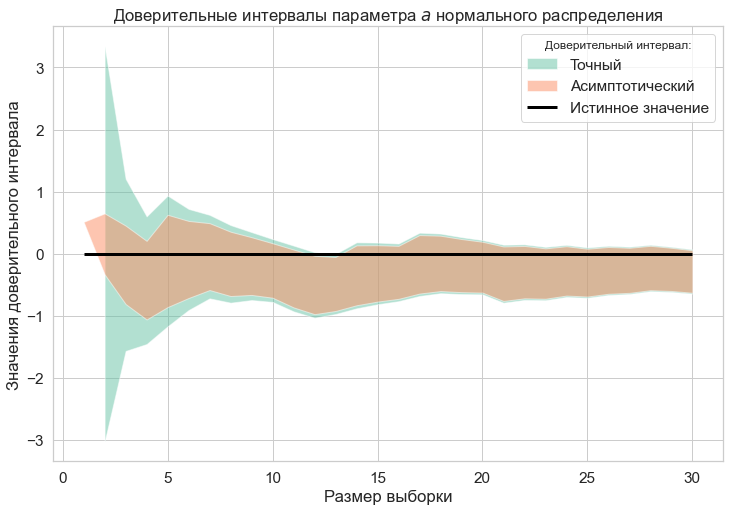

In [18]:
plt.figure(figsize=(12, 8))
plt.title(r'Доверительные интервалы параметра $a$ нормального распределения')
plt.xlabel('Размер выборки')
plt.ylabel('Значения доверительного интервала')
plt.fill_between(
    np.arange(1, exact_conf_interval.shape[1] + 1),
    exact_conf_interval[0],
    exact_conf_interval[1],
    alpha=0.5,
    label='Точный',
)
plt.fill_between(
    np.arange(1, asymptotic_conf_interval.shape[1] + 1),
    asymptotic_conf_interval[0],
    asymptotic_conf_interval[1],
    alpha=0.5,
    label='Асимптотический'
)
plt.hlines(a, 1, n, label=r'Истинное значение', lw=3)
plt.legend(title='Доверительный интервал:')

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

**Вывод:** Точный интервал заметно больше асимптотического при $n\le10$, далее они примерно равны: это значит, что асимптотический интервал значительно завышает вероятность того, что истинное значение окажется в таком маленьком интервале. При большом $n$ точный и асимптотический интервалы примерно совпадают: таким образом, асимптотический интервал уместно использовать вместо точного только на больших выборках.

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [19]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [20]:
city_day = pd.read_csv('city_day.csv', parse_dates=True)[['City', 'Date', 'AQI']].dropna()
city_day

,City,Date,AQI
28,Ahmedabad,2015-01-29,209.0
29,Ahmedabad,2015-01-30,328.0
30,Ahmedabad,2015-01-31,514.0
31,Ahmedabad,2015-02-01,782.0
32,Ahmedabad,2015-02-02,914.0
...,...,...,...
29526,Visakhapatnam,2020-06-27,41.0
29527,Visakhapatnam,2020-06-28,70.0
29528,Visakhapatnam,2020-06-29,68.0
29529,Visakhapatnam,2020-06-30,54.0


Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [21]:
city_day['Day'] = pd.DatetimeIndex(city_day['Date']).day
city_day['Month'] = pd.DatetimeIndex(city_day['Date']).month
city_day['Year'] = pd.DatetimeIndex(city_day['Date']).year
city_day.head(367)

,City,Date,AQI,Day,Month,Year
28,Ahmedabad,2015-01-29,209.0,29,1,2015
29,Ahmedabad,2015-01-30,328.0,30,1,2015
30,Ahmedabad,2015-01-31,514.0,31,1,2015
31,Ahmedabad,2015-02-01,782.0,1,2,2015
32,Ahmedabad,2015-02-02,914.0,2,2,2015
...,...,...,...,...,...,...
656,Ahmedabad,2016-10-18,315.0,18,10,2016
657,Ahmedabad,2016-10-19,213.0,19,10,2016
658,Ahmedabad,2016-10-20,263.0,20,10,2016
659,Ahmedabad,2016-10-21,355.0,21,10,2016


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [22]:
mumbai = city_day[city_day['City'] == 'Mumbai']
kolkata = city_day[city_day['City'] == 'Kolkata']
mumbai, kolkata

(         City        Date   AQI  Day  Month  Year
 23077  Mumbai  2018-05-07  73.0    7      5  2018
 23078  Mumbai  2018-05-08  82.0    8      5  2018
 23079  Mumbai  2018-05-09  84.0    9      5  2018
 23080  Mumbai  2018-05-10  77.0   10      5  2018
 23081  Mumbai  2018-05-11  73.0   11      5  2018
 ...       ...         ...   ...  ...    ...   ...
 23859  Mumbai  2020-06-27  64.0   27      6  2020
 23860  Mumbai  2020-06-28  64.0   28      6  2020
 23861  Mumbai  2020-06-29  54.0   29      6  2020
 23862  Mumbai  2020-06-30  54.0   30      6  2020
 23863  Mumbai  2020-07-01  53.0    1      7  2020
 
 [775 rows x 6 columns],
           City        Date   AQI  Day  Month  Year
 19033  Kolkata  2018-04-11  73.0   11      4  2018
 19034  Kolkata  2018-04-12  60.0   12      4  2018
 19035  Kolkata  2018-04-13  74.0   13      4  2018
 19036  Kolkata  2018-04-14  83.0   14      4  2018
 19037  Kolkata  2018-04-15  95.0   15      4  2018
 ...        ...         ...   ...  ...    ...   .

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [23]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    
    return df[(df['Year'] == year) & (df['Month'] == month)]['AQI']

In [24]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    
    return np.random.choice(sample, size=(k, len(sample)))

In [25]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    take_elements = [np.floor(len(sample) * (1 - alpha) / 2), np.ceil(len(sample) * (1 + alpha) / 2)]
    return np.array(np.take(np.sort(estimator(sample)), take_elements))

In [26]:
def period_bootstrap_conf_interval(df, ym):
    return np.array([
        bootstrap_conf_interval(get_bootstrap_samples(get_dataset_by_month(df, year, month)))
        for year, month in ym
    ])

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [27]:
def plot_conf_interval(labels, AQI, AQI_conf_interval, city_name, city_color):
    plt.fill_between(
        labels,
        AQI_conf_interval[:, 0],
        AQI_conf_interval[:, 1],
        color=city_color,
        alpha=0.5,
        label=f'{city_name}: Доверительный интервал AQI'
    )
    plt.scatter(
        labels,
        AQI,
        color=city_color,
        label=f'{city_name}: AQI'
    )
    plt.plot(
        labels,
        AQI,
        color=city_color,
        lw=3
    )

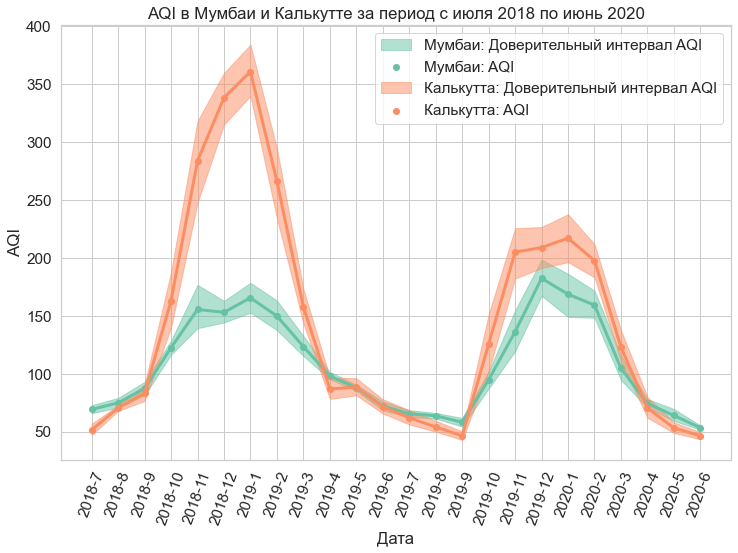

In [28]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике
ym = ym[2:]
ym_df = pd.DataFrame(ym, columns=['Year', 'Month'])
labels = labels[2:]

mumbai_color = sns.color_palette()[0]
kolkata_color = sns.color_palette()[1]

mumbai_AQI_conf_interval = period_bootstrap_conf_interval(mumbai, ym)
kolkata_AQI_conf_interval = period_bootstrap_conf_interval(kolkata, ym)


plt.figure(figsize=(12, 8))
plt.title('AQI в Мумбаи и Калькутте за период с июля 2018 по июнь 2020')
plt.xlabel('Дата')
plt.ylabel('AQI')
plt.tick_params(axis='x', rotation=70)

plot_conf_interval(
    labels,
    [get_dataset_by_month(mumbai, year, month).mean() for year, month in ym],
    mumbai_AQI_conf_interval,
    'Мумбаи',
    mumbai_color
)
plot_conf_interval(
    labels,
    [get_dataset_by_month(kolkata, year, month).mean() for year, month in ym],
    kolkata_AQI_conf_interval,
    'Калькутта',
    kolkata_color
)

plt.legend()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

**Ответ:** по графикам видно, что и в Мумбаи, и в Калькутте индекс качества воздуха зимой значительно выше, чем летом (это означает, что зимой воздух хуже). Кроме того, в 2020 году AQI ниже, чем в 2019 (то есть, качество воздуха улучшилось). Это можно связать с приостановкой работы многих предприятий и ограничением передвижения людей (в том числе на личном транспорте) из-за пандемии COVID-19

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [29]:
def plot_month_conf_interval(labels, ym, month_AQI, city_name, city_color):
    AQI_conf_interval = np.tile(bootstrap_conf_interval(get_bootstrap_samples(month_AQI)), (1, len(month_AQI)))
    plot_conf_interval(
        labels,
        month_AQI,
        AQI_conf_interval,
        city_name,
        city_color
    )

def plot_aprils_comparison(city_data, city_name):
    april2019 = [2019, 4]
    april2020 = [2020, 4]
    
    april2019_data = get_dataset_by_month(city_data, april2019[0], april2019[1])
    april2020_data = get_dataset_by_month(city_data, april2020[0], april2020[1])
    
    april2019_color = sns.color_palette()[2]
    april2020_color = sns.color_palette()[3]
    
    labels = np.arange(1, 30 + 1)
    
    plt.figure(figsize=(12, 8))
    plt.title(f'AQI в {city_name} за апрель 2019 и апрель 2020 года')
    plt.xlabel('День')
    plt.ylabel('AQI')
    
    plot_month_conf_interval(labels, april2019, april2019_data, '2019', april2019_color)
    plot_month_conf_interval(labels, april2020, april2020_data, '2020', april2020_color)
    plt.hlines(april2019_data.mean(), labels[0], labels[-1], color=april2019_color, lw=3, label='2019: средний AQI')
    plt.hlines(april2020_data.mean(), labels[0], labels[-1], color=april2020_color, lw=3, label='2020: средний AQI')
    
    plt.legend()
    

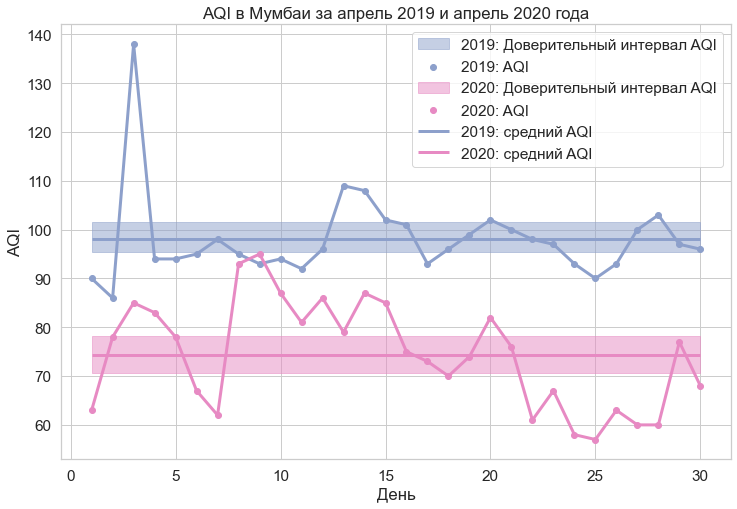

In [30]:
plot_aprils_comparison(mumbai, 'Мумбаи')

Теперь проделайте то же самое для Калькутты

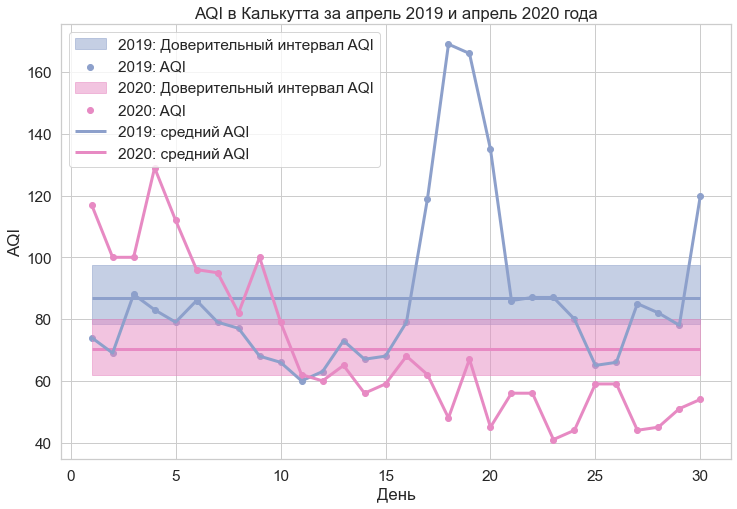

In [31]:
plot_aprils_comparison(kolkata, 'Калькутта')

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

**Вывод:** как в случае Мумбаи, так и в случае Калькутты, доверительный интервал AQI за апрель 2020 года располагается на графике ниже, чем за апрель 2019 года. Это значит, в каждый конкретный день в 2020-ом году вероятность того, что воздух будет чище, чем ровно год назад, больше, чем наоборот. По-простому это означает, что качество воздуха улучшилось.